In [4]:
import random, re, csv
import numpy as np
from sklearn import metrics,svm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from simdata import *
#from interdata_mysql_simple import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#==============================================
# make mix_data from csv files
#==============================================
mixdata_sim_filedir='../resources/gamedata/mixdata_sim.csv'
inerdata_sim_filedir='../resources/gamedata/interdata_sim.csv'
biodata_sim_filedir='../resources/gamedata/biodata_sim.csv'

mixdata_sim=get_mldata(mixdata_sim_filedir)
interdata_sim=get_mldata(inerdata_sim_filedir)
biodata_sim=get_mldata(biodata_sim_filedir)

In [6]:
#==============================================
# prepare features/labels for analysis
#==============================================
# make featrues and labels for analysis
features_svm=[]
labels_svm=[]

for i in mixdata_sim:
    features_svm=features_svm+[i[0:4]]
    labels_svm=labels_svm+[i[-1]]

labels_svm_np = np.array(labels_svm)
features_svm_np = np.array(features_svm)

# make data follow natural distribution
features_svm_np_nd = (features_svm_np - features_svm_np.mean(axis=0)) / features_svm_np.std(axis=0)

# make train/test lists for analysis
train_features, \
test_features, \
train_labels, \
test_labels = train_test_split(features_svm_np_nd, labels_svm_np, test_size=0.33)

In [9]:
#============================
#classify interata by SVM
#============================

clf_svm=svm.SVC(C=1)
clf_svm.fit(train_features,train_labels)
labels_pre_svm=clf_svm.predict(test_features)
#============================
# Evaluation
#============================

acc_svm=accuracy_score(test_labels,labels_pre_svm)
#print("acc_svm:",acc_svm)

In [10]:
#=========================
# make noise
#=========================
# name:noisydata_uni
# fun: add uniform noise in to data
# in: rawdata(np.array, NOT normalized), valuerange([low,high+1], range of noise)
# out: noisydata(np.array)

def get_uninoisydata(rawdata,valuerange):
    uni_noise = np.random.randint(valuerange[0],valuerange[1],size=rawdata.size)
    noisydata=uni_noise+rawdata
    return noisydata

In [11]:
#=========================
# add noise 
#=========================
# name:get_uninoisylabel
# fun: add uniform noise in to data
# in: rawdata(np.array, NOT normalized), valuerange([low,high+1], range of noise)
# out: noisydata(np.array)
def get_uninoisylabel(rawlabel,noiselevel):
    noisenum=int(noiselevel/100*rawlabel.size)
    uninoise=np.random.randint(0,1,size=noisenum)
    label_uninoise=np.append(uninoise,rawlabel[noisenum:])
    return label_uninoise


In [15]:
noiselevel=40
#temp_tl=train_labels[0:10]
train_labels_uninoise=get_uninoisylabel(train_labels,noiselevel) 
#============================
#classify interata by SVM
#============================

clf_svm=svm.SVC(C=1)
clf_svm.fit(train_features,train_labels_uninoise)
labels_pre_svm=clf_svm.predict(test_features)
#============================
# Evaluation
#============================

acc_svm=accuracy_score(test_labels,labels_pre_svm)
print("acc_svm:",acc_svm)


acc_svm: 1.0


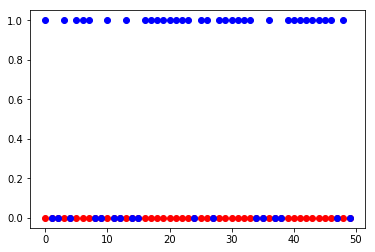

In [17]:
plt.plot(train_labels_uninoise[0:50],'ro')
plt.plot(train_labels[0:50],'bo')
plt.show()

In [1]:
rawdata=test_features[0]
noisydata=get_uninoisydata(rawdata)

num_data=np.arange(0,noisydata.size)
plt.plot(num_data,noisydata,'ro-',label='Noisy Data')
plt.plot(rawdata,'bo-',label='Raw Data')
plt.legend() # 展示图例
plt.xlabel('Offer type') # 给 x 轴添加标签
plt.ylabel('Offer Value') # 给 y 轴添加标签
plt.title('Uniform Noise Analysis') # 添加图形标题
plt.show()

NameError: name 'test_features' is not defined

/Users/cancui/anaconda3/envs/abiba_analysis_v2/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


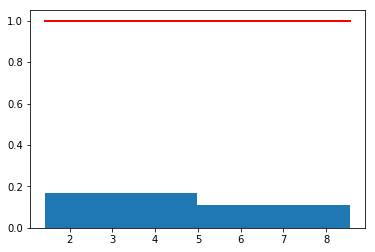

[ 4.51789202  3.34450513  5.17715261  7.15023107  1.43146851  2.89142139
  6.40747822  1.93989969  8.54790415  3.08578361]


In [104]:
count, bins, ignored = plt.hist(s, 2,normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()
print(s)

In [189]:
a=np.arange(9).reshape(3,3)
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [220]:
a=np.random.randint(0,2,3)
b=np.arange(10,19)
print(b)
b[:3]=a
print(b)

[10 11 12 13 14 15 16 17 18]
[ 1  0  1 13 14 15 16 17 18]


In [7]:
#========================
# kmeans
#========================
def addone(x): return x+1
X = np.array(train_features)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kresult=kmeans.predict(test_features)
'''
for i in range(len(kresult)):
	if kresult[i]==0:
		kresult[i]=1
	else:
		kresult[i]=0
'''

print("kresult: ",kresult)

print("test_tables: ",test_labels)

#evaluation on k-means
print(stats.ttest_ind(kresult,test_labels))
print(accuracy_score(kresult,test_labels))

print(metrics.adjusted_rand_score(kresult,test_labels))
'''

[1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1]


'\nprint test_labels\nprint stats.ttest_ind(kresult,test_labels)\nprint accuracy_score(kresult,test_labels)\n\nprint metrics.adjusted_rand_score(kresult,test_labels)\n'